In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [82]:
# считывание файла
df1 = pd.read_csv('data/ex1.csv') 

In [83]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Text(0.5, 0, 'y')

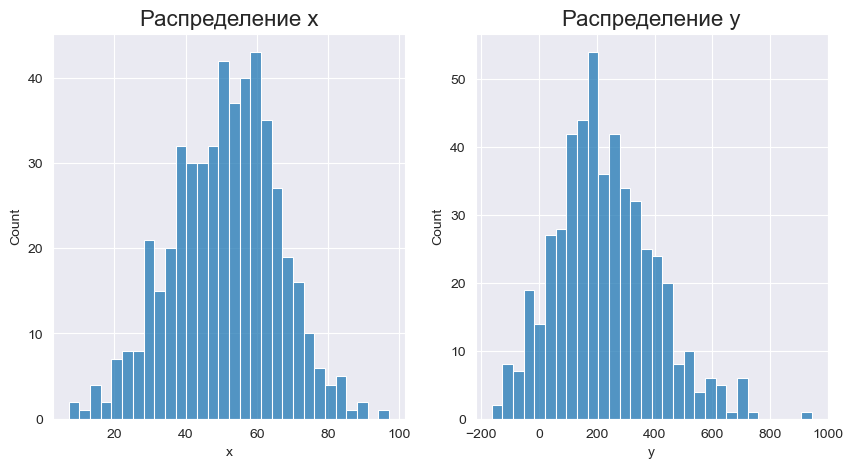

In [84]:
# построение гистограмм распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
histplot1 = sns.histplot(
    data=df1,
    x='x',
    bins=30,
    ax=axes[0]
)
histplot1.set_title('Распределение x', fontsize=16)
histplot1.set_xlabel('x')

histplot2 = sns.histplot(
    data=df1,
    x='y',
    bins=30,
    ax=axes[1]
)
histplot2.set_title('Распределение y', fontsize=16)
histplot2.set_xlabel('y')

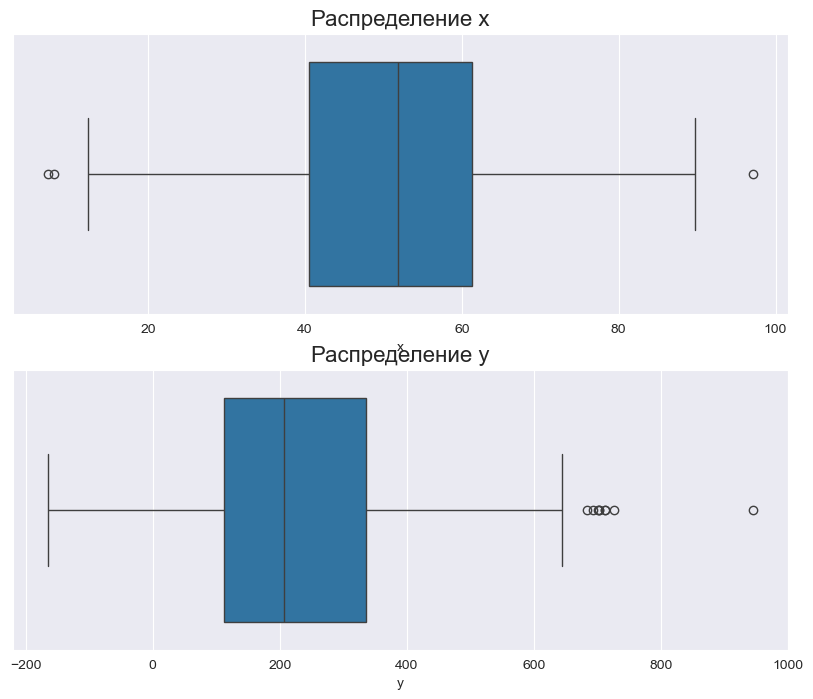

In [85]:
# построение "ящика с усами" для изучения выбросов
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

box1 = sns.boxplot(x='x', data=df1, ax=axes[0])
box1.set_title('Распределение x', fontsize=16)

box2 = sns.boxplot(x='y', data=df1, ax=axes[1])
box2.set_title('Распределение y', fontsize=16)

plt.show()

<Axes: xlabel='x', ylabel='y'>

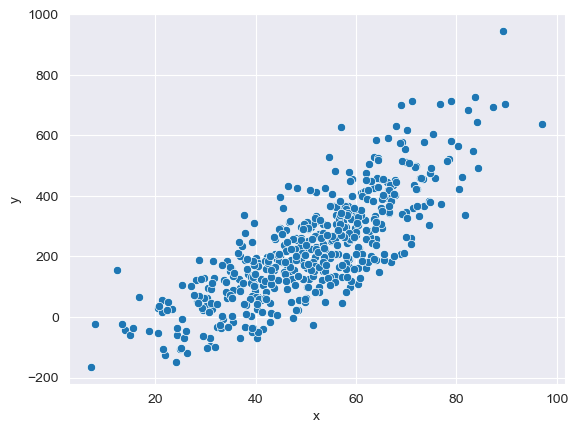

In [86]:
# построение диаграммы рассеяния
sns.scatterplot(data=df1, x='x', y='y')

In [87]:
# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков

Обе переменные числовые и их распределение по гистограмме похоже на нормальное. По диаграмме рассеяния их взаимосвязь похожа на линейную. На "ящиках с усами" видно наличие в распределении обоих переменных выбросов, однако на диаграмме рассеяния они не выглядят сильно выбивающимися из линейной зависимости, поэтому считаю, что в данном случае подходит коэффициент Пирсона.

In [88]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона
n = df1.shape[0]
alpha = 0.05
r, p_value = stats.pearsonr(df1['x'], df1['y'])
print(r, p_value)

# расчет t-критерия
# Принятие решения на основе критического значения t
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
print('t-score:', t_score)
t_critical = stats.t.ppf(1 - alpha/2, df = n-2)
print('Critical t-Score:',t_critical)
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

# Принятие решения на основе p-значения
p_value = (1 - stats.t.cdf(np.abs(t_score), df = n-2)) * 2
print('P-Value :',p_value)
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

0.8032321850936794 3.973859056368234e-114
t-score: 30.092129139493785
Critical t-Score: 1.9647389829672648
Связь статистически значима
P-Value : 0.0
Связь статистически значима


In [89]:
# вывод о степени корреляции величин и статистической значимости их взаимосвязи 

Коэффициент корреляции получился приблизительно равным 0.8, что говорит о сильной прямой взаимосвязи. t-критерий значительно больше критического, поэтому связь можно считать статистически значимой.

Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [90]:
# считывание файла
df2 = pd.read_csv('data/ex2.csv') 

In [91]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Text(0.5, 0, 'y')

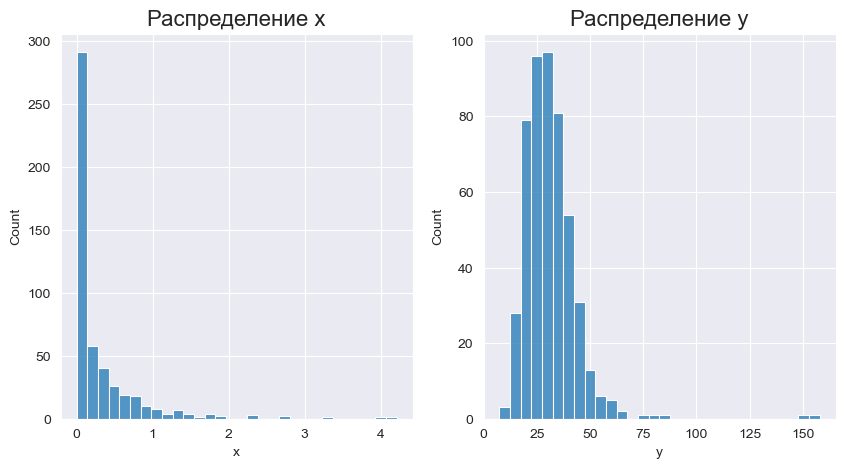

In [92]:

# построение гистограмм распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
histplot1 = sns.histplot(
    data=df2,
    x='x',
    bins=30,
    ax=axes[0]
)
histplot1.set_title('Распределение x', fontsize=16)
histplot1.set_xlabel('x')

histplot2 = sns.histplot(
    data=df2,
    x='y',
    bins=30,
    ax=axes[1]
)
histplot2.set_title('Распределение y', fontsize=16)
histplot2.set_xlabel('y')

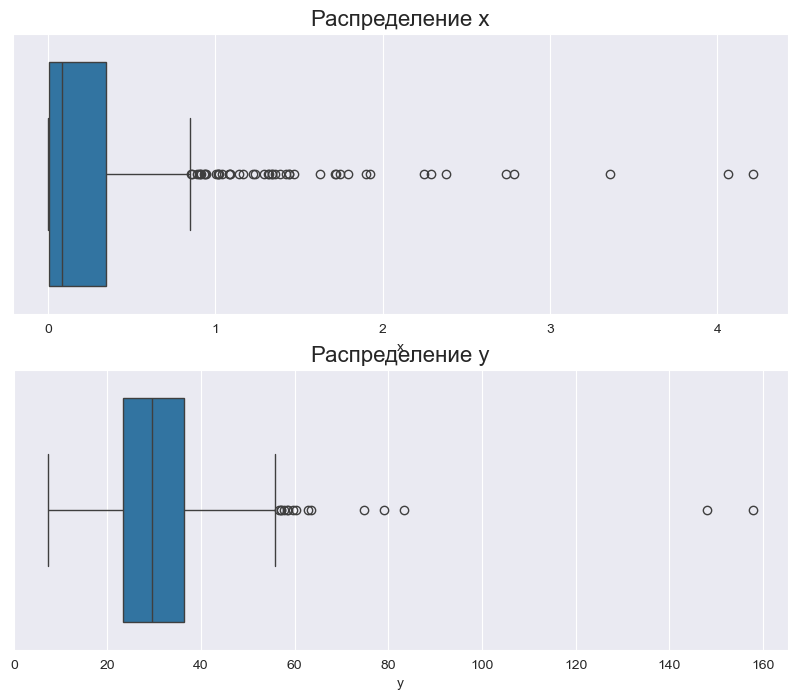

In [93]:
# построение "ящика с усами" для изучения выбросов
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

box1 = sns.boxplot(x='x', data=df2, ax=axes[0])
box1.set_title('Распределение x', fontsize=16)

box2 = sns.boxplot(x='y', data=df2, ax=axes[1])
box2.set_title('Распределение y', fontsize=16)

plt.show()

<Axes: xlabel='x', ylabel='y'>

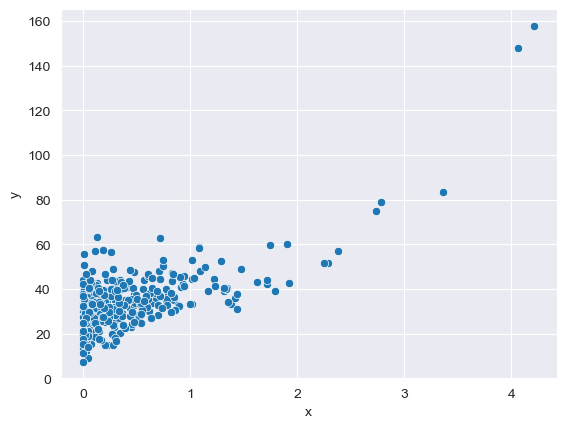

In [94]:
# построение диаграммы рассеяния
sns.scatterplot(data=df2, x='x', y='y')

In [95]:
# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков

Обе переменные числовые, однако не нормально распределены, присутствует значительное число выбросов, а взаимосвязь нелинейна. В таких условиях подходит коэффициент Спирмена.

In [96]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена
n = df2.shape[0]
alpha = 0.05
r, p_value = stats.spearmanr(df2['x'], df2['y'])
print(r, p_value)

# расчет t-критерия
# Принятие решения на основе критического значения t
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
print('t-score:',t_score)
t_critical = stats.t.ppf(1 - alpha/2, df = n-2)
print('Critical t-Score:',t_critical)
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

# Принятие решения на основе p-значения
p_value = (1 - stats.t.cdf(np.abs(t_score), df = n-2)) * 2
print('P-Value :',p_value)
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")
# вывод о степени корреляции величин и статистической значимости их взаимосвязи 


0.6170866283465134 8.471901488365329e-54
t-score: 17.500235697828852
Critical t-Score: 1.9647389829672648
Связь статистически значима
P-Value : 0.0
Связь статистически значима


Коэффициент корреляции примерно равен 0.62, что говорит о заметной взаимосвязи. При этом значение t-критерия говорит о том, что связь статистически значимая.

Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [97]:
# считывание файла
df3 = pd.read_csv('data/ex3.csv') 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes


<Axes: xlabel='x', ylabel='y'>

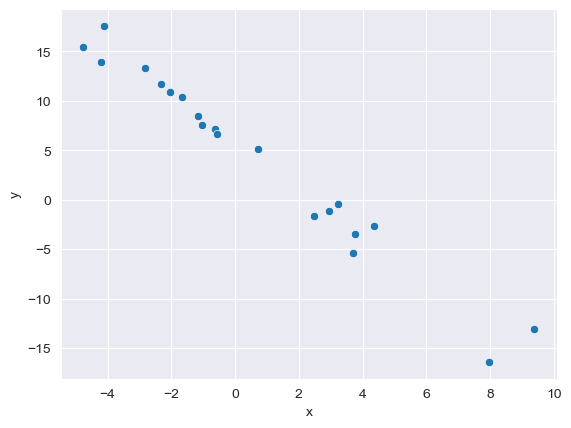

In [98]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния
sns.scatterplot(data=df3, x='x', y='y')

In [99]:
# вывод о целесообразности использования корреляции Пирсона

Обе переменные числовые. На диаграмме рассеяния видна линейная обратная зависимость и отсутствие критических выбросов. В таких условиях подойдет коэффициент Пирсона. 

In [100]:
# расчет коэффициента Пирсона
n = df3.shape[0]
alpha = 0.05
r, p_value = stats.pearsonr(df3['x'], df3['y'])
print(r, p_value)
# Принятие решения на основе критического значения t
t_score = r*(n-2)**0.5 / (1-r**2)**0.5
print('t-score:', t_score)
t_critical = stats.t.ppf(1 - alpha/2, df = n-2)
print('Critical t-Score:',t_critical)
if np.abs(t_score) > t_critical:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")

# Принятие решения на основе p-значения
p_value = (1 - stats.t.cdf(np.abs(t_score), df = n-2)) * 2
print('P-Value :',p_value)
if p_value < alpha:
    print("Связь статистически значима")
else:
    print("Нельзя отклонить нулевую гипотезу")


-0.9851417834585035 3.176453356769722e-15
t-score: -24.336374789300695
Critical t-Score: 2.10092204024096
Связь статистически значима
P-Value : 3.1086244689504383e-15
Связь статистически значима


Коэффициент Пирсона подтвердил сильную обратную связь переменных, при этом связь статистически значима.

In [101]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии
res = stats.linregress(df3['x'], df3['y'])
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}, p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f' Y = {round(res.intercept, 3)} + {round(res.slope, 3)}*X')

Коэффициент наклона -2.3391357411141347, сдвиг 5.740762449346206
Коэффициент корреляции -0.9851417834585033, коэффициент детерминации 0.9705043335158007, p-value (из теста Вальда в предположении, что наклон равен нулю) 3.1764533567699388e-15
 Y = 5.741 + -2.339*X


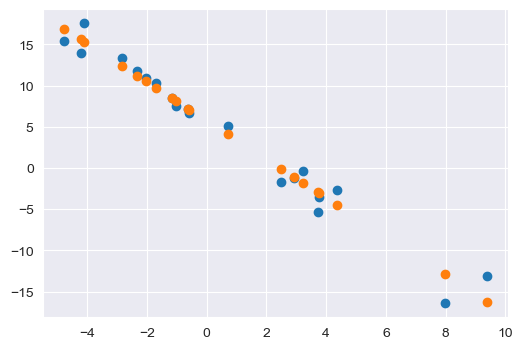

In [102]:
# построение диаграммы рассеяния прогнозных и реальных значений на одном графике
y_pred = res.intercept + res.slope*df3['x']
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df3['x'], df3['y'])
ax.scatter(df3['x'], y_pred)
plt.show()


In [103]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации
approax_err = np.abs((df3['y'] - (res.intercept + res.slope * df3['x']))/df3['y']).mean()
print(f'Средняя ошибка аппроксимации: {approax_err}')


Средняя ошибка аппроксимации: 0.3526380487772689


Средняя ошибка аппроксимации получилась значительно больше, чем 0.1. Это говорит о недостаточности переменной Х для объяснения переменной Y. На диаграмме рассеяния прогнозных и реальных значений видно, что отклонения в центре графика минимальны, а к краям увеличивается, что косвенно подтверждает эту гипотезу.

In [104]:
# КРИТЕРИЙ 8

# расчет F-критерия
F = (res.rvalue**2/(1 - res.rvalue**2))*(n-2)
F_crit = stats.f.ppf(1-alpha, 1, n - 1 - 1)
print(f'F={F}, F_crit={F_crit}')
# вывод о статистической значимости уравнения в целом

F=592.2591378853061, F_crit=4.413873419170566


Так как рассчитанный F-критерий намного больше критического, признаем уравнение статистически значимым.

In [105]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции

t_coef = abs(stats.t.ppf(alpha/2, n-2))
t_real = F ** 0.5
print(f'Расчетное значение t-критерия: {t_real}, критическое значение t-критерия: {t_coef}')

Ошибка наклона 0.09611685229891045, ошибка сдвига 0.3755103704947338
Расчетное значение t-критерия: 24.336374789300606, критическое значение t-критерия: 2.10092204024096


In [106]:
# вывод о статистической значимости коэффициентов регрессии

Так как расчетное значение t-критерия для коэффициентов регрессии и корреляции больше критического, эти коэффициенты статистически значимы.

In [107]:
# запись диапазона коэффицентов регрессии
print(f"slope (95%): {res.slope:.3f} +/- {t_coef*res.stderr:.3f}")
print(f"intercept (95%): {res.intercept:.3f} +/- {t_coef*res.intercept_stderr:.3f}")

slope (95%): -2.339 +/- 0.202
intercept (95%): 5.741 +/- 0.789


In [121]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6
y0 = res.intercept + res.slope*x0
var_o = (y_pred - df3['y'])**2
S0 = (var_o.sum()/(n-1-1))**0.5
delta = S0*(1+1/n+(x0-df3['x'].mean())**2/(n*df3['x'].var()))*t_coef
print(f'При x0={x0} y принимает значения в интервале {y0-delta}<y0<{y0+delta}')

При x0=6 y принимает значения в интервале -12.262910058301554<y0<-4.32519393637565


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [109]:
# считывание файла
df4 = pd.read_csv('data/ex4.csv')
df4.describe()

,x1,x2,y
count,20.000000,20.000000,20.000000
mean,4.234983,20.653247,66.293610
std,5.365649,5.612606,35.571970
min,-6.443507,10.526957,-9.893143
25%,0.253494,17.281618,42.553666
50%,4.668408,21.631761,63.164475
75%,9.152888,24.944673,92.805205
max,13.637973,30.243347,137.003862


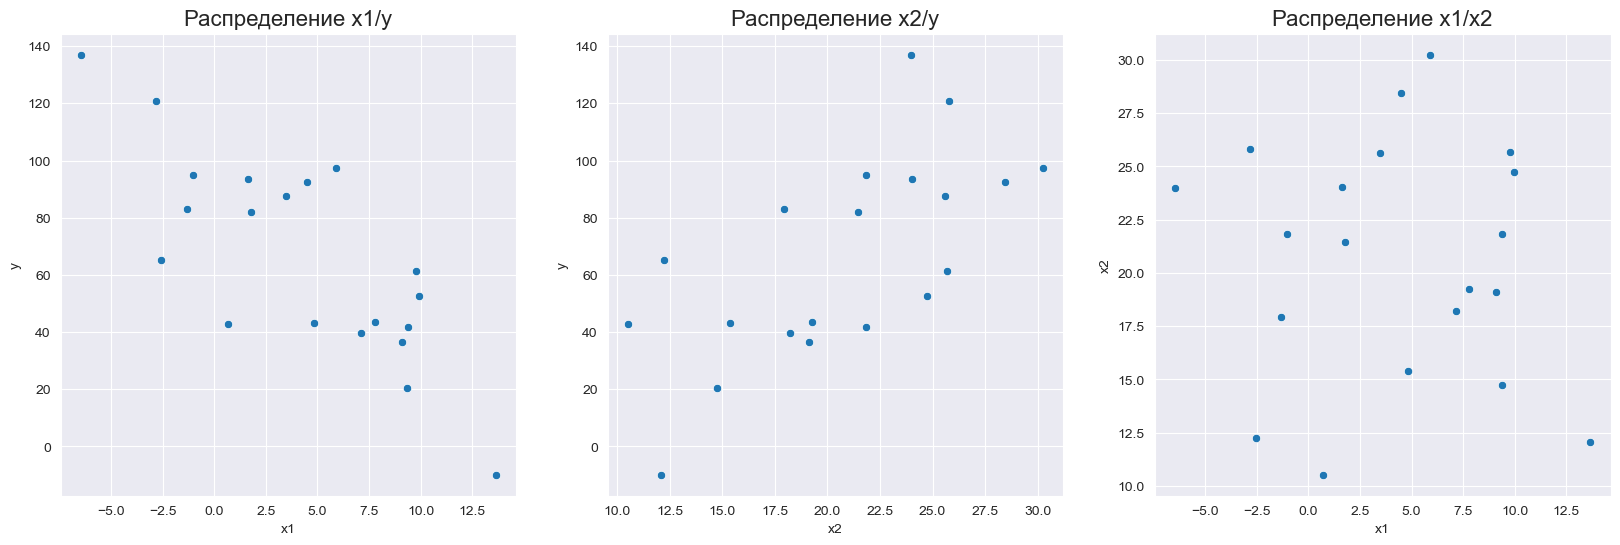

In [110]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

scat1 = sns.scatterplot(x='x1', y='y', data=df4, ax=axes[0])
scat1.set_title('Распределение x1/y', fontsize=16)

scat2 = sns.scatterplot(x='x2', y='y', data=df4, ax=axes[1])
scat2.set_title('Распределение x2/y', fontsize=16)

scat3 = sns.scatterplot(x='x1', y='x2', data=df4, ax=axes[2])
scat3.set_title('Распределение x1/x2', fontsize=16)

plt.show()

In [111]:

# вывод о корректности использования модели множественной регрессии

По диаграммам рассеяния можно предположить обратную зависимость y от x1, прямую от x2 и отсутствие корреляции между x1 и x2. При таких условиях модель множественной регрессии должна подойти.

In [112]:
# расчет коэффициентов корреляции
corr_matrix = df4.corr()
corr_matrix

,x1,x2,y
x1,1.000000,-0.075013,-0.787807
x2,-0.075013,1.000000,0.669834
y,-0.787807,0.669834,1.000000


In [113]:
# вывод о необходимости устранения какого-либо фактора

По матрице корреляции видно сильное влияние на y обоих переменных и при этом практически полное отсутствие корреляции между самими переменными. Это позволяет сделать вывод о том, что не нужно устранять никакой из факторов.

In [114]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии
# стандартизируем данные
x1 = (df4['x1']-df4['x1'].mean())/df4['x1'].std()
x2 = (df4['x2']-df4['x2'].mean())/df4['x2'].std()
y = (df4['y']-df4['y'].mean())/df4['y'].std()
X = np.array([x1, x2]).T
# добавляем интерцепт
X = sm.add_constant(X)

# создаем модель множественной регрессии
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           6.90e-21
Time:                        01:10:03   Log-Likelihood:                 26.749
No. Observations:                  20   AIC:                            -47.50
Df Residuals:                      17   BIC:                            -44.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-17      0.015    4.5e-15      1.0

In [115]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии
b_x1 = model.params.x1 * df4['y'].std() / df4['x1'].std()
b_x2 = model.params.x2 * df4['y'].std() / df4['x2'].std()
a = df4['y'].mean() - b_x1 * df4['x1'].mean() - b_x2 * df4['x2'].mean()
print(f'Коэффициенты чистой регрессии: a = {a}, b_x1 = {b_x1}, b_x2 = {b_x2}')

Коэффициенты чистой регрессии: a = 6.722076359546861, b_x1 = -4.917384791357815, b_x2 = 3.8926845815394926


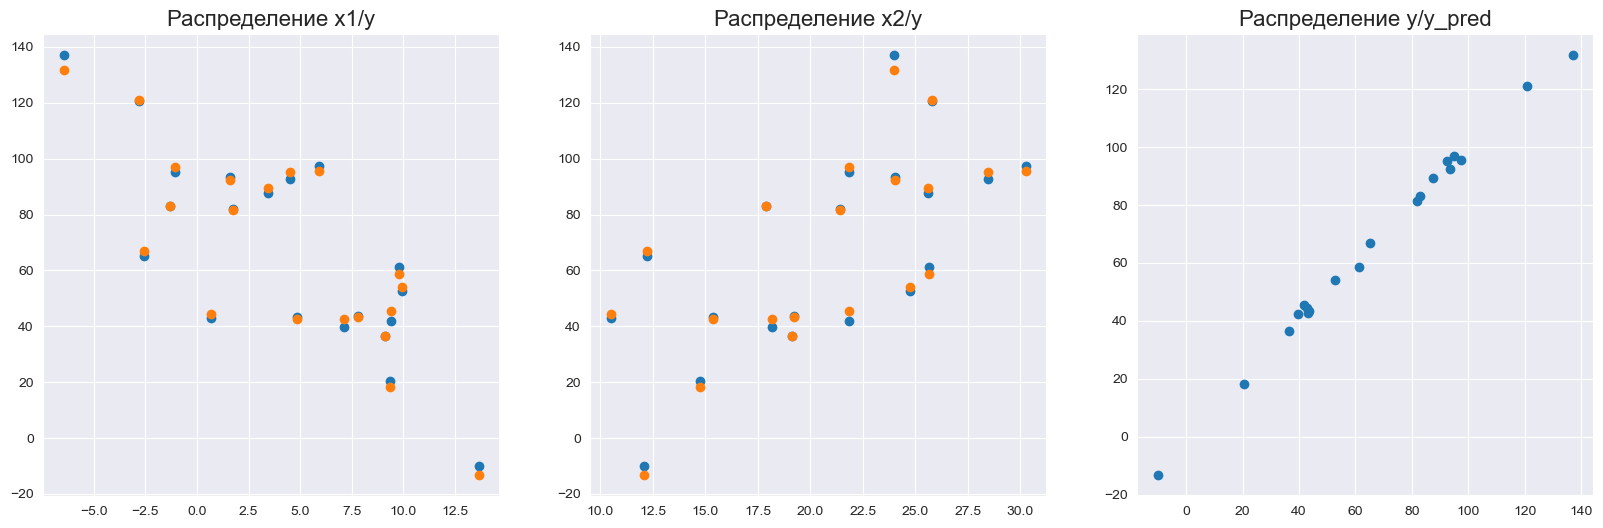

In [116]:
# построение диаграмм рассеяния прогнозных и реальных значений на одном графике
df4['y_pred'] = a + b_x1 * df4['x1'] + b_x2 * df4['x2']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].scatter(df4['x1'], df4['y'])
axes[0].scatter(df4['x1'], df4['y_pred'])
axes[0].set_title('Распределение x1/y', fontsize=16)

axes[1].scatter(df4['x2'], df4['y'])
axes[1].scatter(df4['x2'], df4['y_pred'])
axes[1].set_title('Распределение x2/y', fontsize=16)

axes[2].scatter(df4['y'], df4['y_pred'])
axes[2].set_title('Распределение y/y_pred', fontsize=16)

plt.show()

In [123]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции
r_x1 = corr_matrix['y']['x1']
r_x2 = corr_matrix['y']['x2']
R = model.params.x1 * r_x1 + model.params.x2 * r_x2
print(f'Индекс множественной регрессии R = {R}')

Индекс множественной регрессии R = 0.9957525438616117


In [118]:
# расчет F-критерия
n = df4.shape[0]
F = (R**2 / (1 - R**2)) * ((n - 1 - 2)/ 2)
F_crit = stats.f.ppf(1-0.05, 2, n - 1 - 2)
print(f'F={F}, F_crit={F_crit}')

F=994.2284366835765, F_crit=3.5915305684750827


In [119]:
# вывод о статистической значимости уравнения в целом

Так как рассчитанный F-критерий намного больше критического, признаем уравнение статистически значимым.


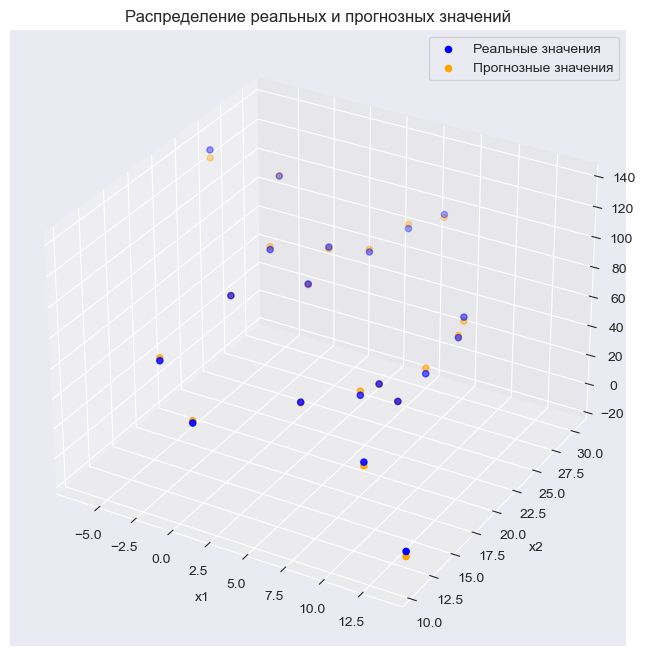

In [120]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Реальные значения
ax.scatter(df4['x1'], df4['x2'], df4['y'], color='blue', label='Реальные значения')

# Прогнозные значения
ax.scatter(df4['x1'], df4['x2'], df4['y_pred'], color='orange', label='Прогнозные значения')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Распределение реальных и прогнозных значений')
ax.legend()
plt.show()